# Importamos librerias y pkl final con todos los datos limpios

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle('../data/reservas_hoteles_final.pkl')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15023 entries, 0 to 15097
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id_hotel         15023 non-null  int64         
 1   nombre_hotel     15023 non-null  object        
 2   ciudad           15023 non-null  object        
 3   estrellas        15023 non-null  float64       
 4   precio_noche     15023 non-null  float64       
 5   fecha_reserva    15023 non-null  datetime64[ns]
 6   inicio_estancia  15023 non-null  datetime64[ns]
 7   final_estancia   15023 non-null  datetime64[ns]
 8   competencia      15023 non-null  bool          
 9   id_reserva       15023 non-null  object        
 10  id_cliente       15023 non-null  object        
 11  nombre           15023 non-null  object        
 12  apellido         15023 non-null  object        
 13  mail             15023 non-null  object        
dtypes: bool(1), datetime64[ns](3), float64(2), 

In [11]:
# Creamos dos dataframes que corresponde a los hoteles propios y el de la competencia
df_propio = df[df['competencia'] == False]
df_competencia = df[df['competencia'] == True]

# Analizamos la distribucion de precios en promedio de los hoteles propios

In [22]:
df_propio['precio_noche'].describe().round(2)

count    9874.00
mean      275.12
std       129.41
min        50.01
25%       163.12
50%       273.32
75%       387.83
max       499.82
Name: precio_noche, dtype: float64

Este análisis estadístico describe la distribución de precios por noche en los hoteles propios. Aquí algunos puntos clave:

- Precio promedio: 275.12 euros por noche.
- Desviación estándar: 129.41 euros, lo que indica una dispersión moderada de los precios.
- Precio mínimo: 50.01euros, lo que sugiere que hay opciones económicas dentro de la oferta.
- Precio máximo: 499.82 euros, lo que indica que también hay opciones premium.
- Cuartiles:
    - 25% (Q1): 163.12 euros → Un cuarto de los hoteles tiene precios menores a este valor.
    - 50% (Mediana): 273.32 euros→ La mitad de los precios están por debajo de este valor.
    - 75% (Q3): 387.83euros → El 25% más caro de los hoteles supera este precio.

 ## 📊 Conclusión
La distribución parece bastante amplia, con hoteles tanto económicos como de alta gama. La mediana es muy cercana a la media, lo que sugiere que la distribución de precios es bastante simétrica sin grandes sesgos.

# Analizamos la distribucion de precios en promedio de los hoteles de la competencia

In [23]:
df_competencia['precio_noche'].describe().round(2)

count    5149.00
mean      113.45
std        31.36
min        77.00
25%        90.00
50%       102.00
75%       119.00
max       172.00
Name: precio_noche, dtype: float64

La distribución de precios por noche en los hoteles propios.

- Precio promedio: 113.45 euros por noche (mucho menor que el de los hoteles propios).
- Desviación estándar: 31.36, lo que indica una dispersión baja en los precios.
- Precio mínimo: 77.00, más alto que el mínimo de los hoteles propios (50.01).
- Precio máximo: 172.00, mucho más bajo que el de los hoteles propios (499.82).
- Cuartiles:
    - 25% (Q1): 90.00 → Un cuarto de los hoteles tiene precios menores a este valor.
    - 50% (Mediana): 102.00 euros→ La mitad de los precios están por debajo de este valor.
    - 75% (Q3): 119.0 euros → El 25% más caro de los hoteles supera este precio.

 ## 📊 Conclusión
✅ Los hoteles propios son significativamente más caros que los de la competencia (promedio de 275 vs. 113).
✅ Mayor rango de precios en los hoteles propios, con opciones de lujo que llegan hasta 499.82, mientras que en la competencia el tope es 172.
✅ Mayor dispersión de precios en los hoteles propios (desviación estándar de 129 vs. 31 en la competencia).
✅ La mediana es más del doble en los hoteles propios (273.32 vs. 102), lo que indica que la diferencia de precios no es solo por algunos hoteles de lujo, sino que en general los hoteles propios tienen tarifas más altas.

# Analizamos la distribucion de precios en el tiempo de las reservas de los hoteles propios


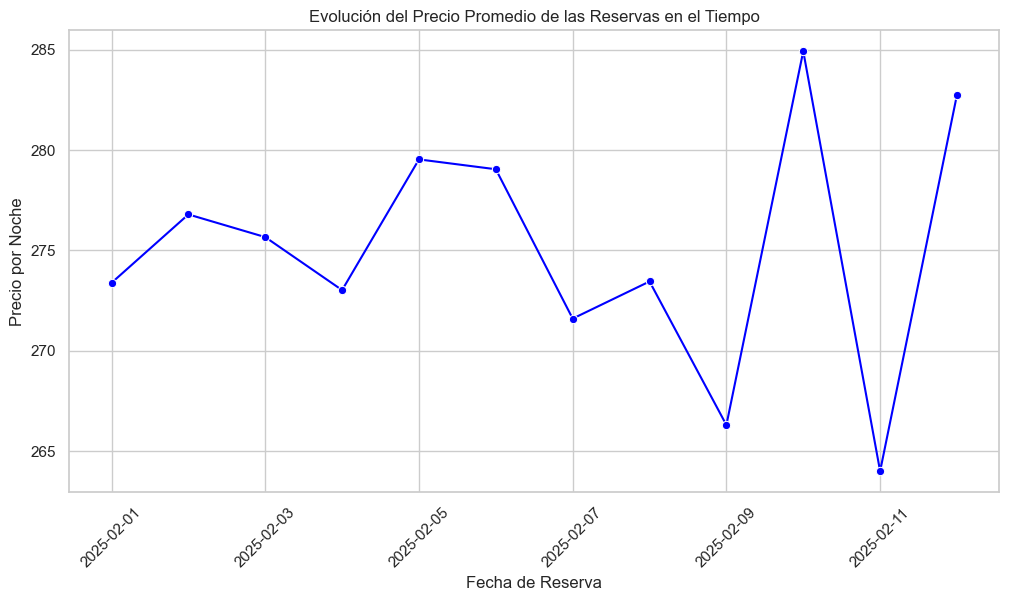

In [33]:
# Agrupamos por fecha y calculamos el precio promedio por día
df_reserva_precios = df_propio.groupby("fecha_reserva")["precio_noche"].mean().round(2).reset_index()
df_reserva_precios

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_reserva_precios, 
                x="fecha_reserva", 
                y="precio_noche",
                marker="o", 
                color="blue")

# Personalización del gráfico
plt.title("Evolución del Precio Promedio de las Reservas en el Tiempo")
plt.xlabel("Fecha de Reserva")
plt.ylabel("Precio por Noche")
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.show()

## 🔍 Principales observaciones:

- 1. Variabilidad en los precios

Se observan fluctuaciones en los precios a lo largo del tiempo.
Hay picos y caídas, lo que podría indicar cambios en la demanda o estrategias de pricing dinámico.

- 2. Picos y caídas significativas

Alrededor del 9 y 11 de febrero, hay una fuerte caída seguida de un pico alto. Esto podría deberse a promociones, cambios de demanda o eventos específicos que afectan los precios.

- 3. Tendencia general

A pesar de la variabilidad, los precios oscilan en torno a 275-280, lo que es consistente con el análisis previo de la media y la mediana.


# Analizamos la evolución de las reservas de cada hotel propio en particular

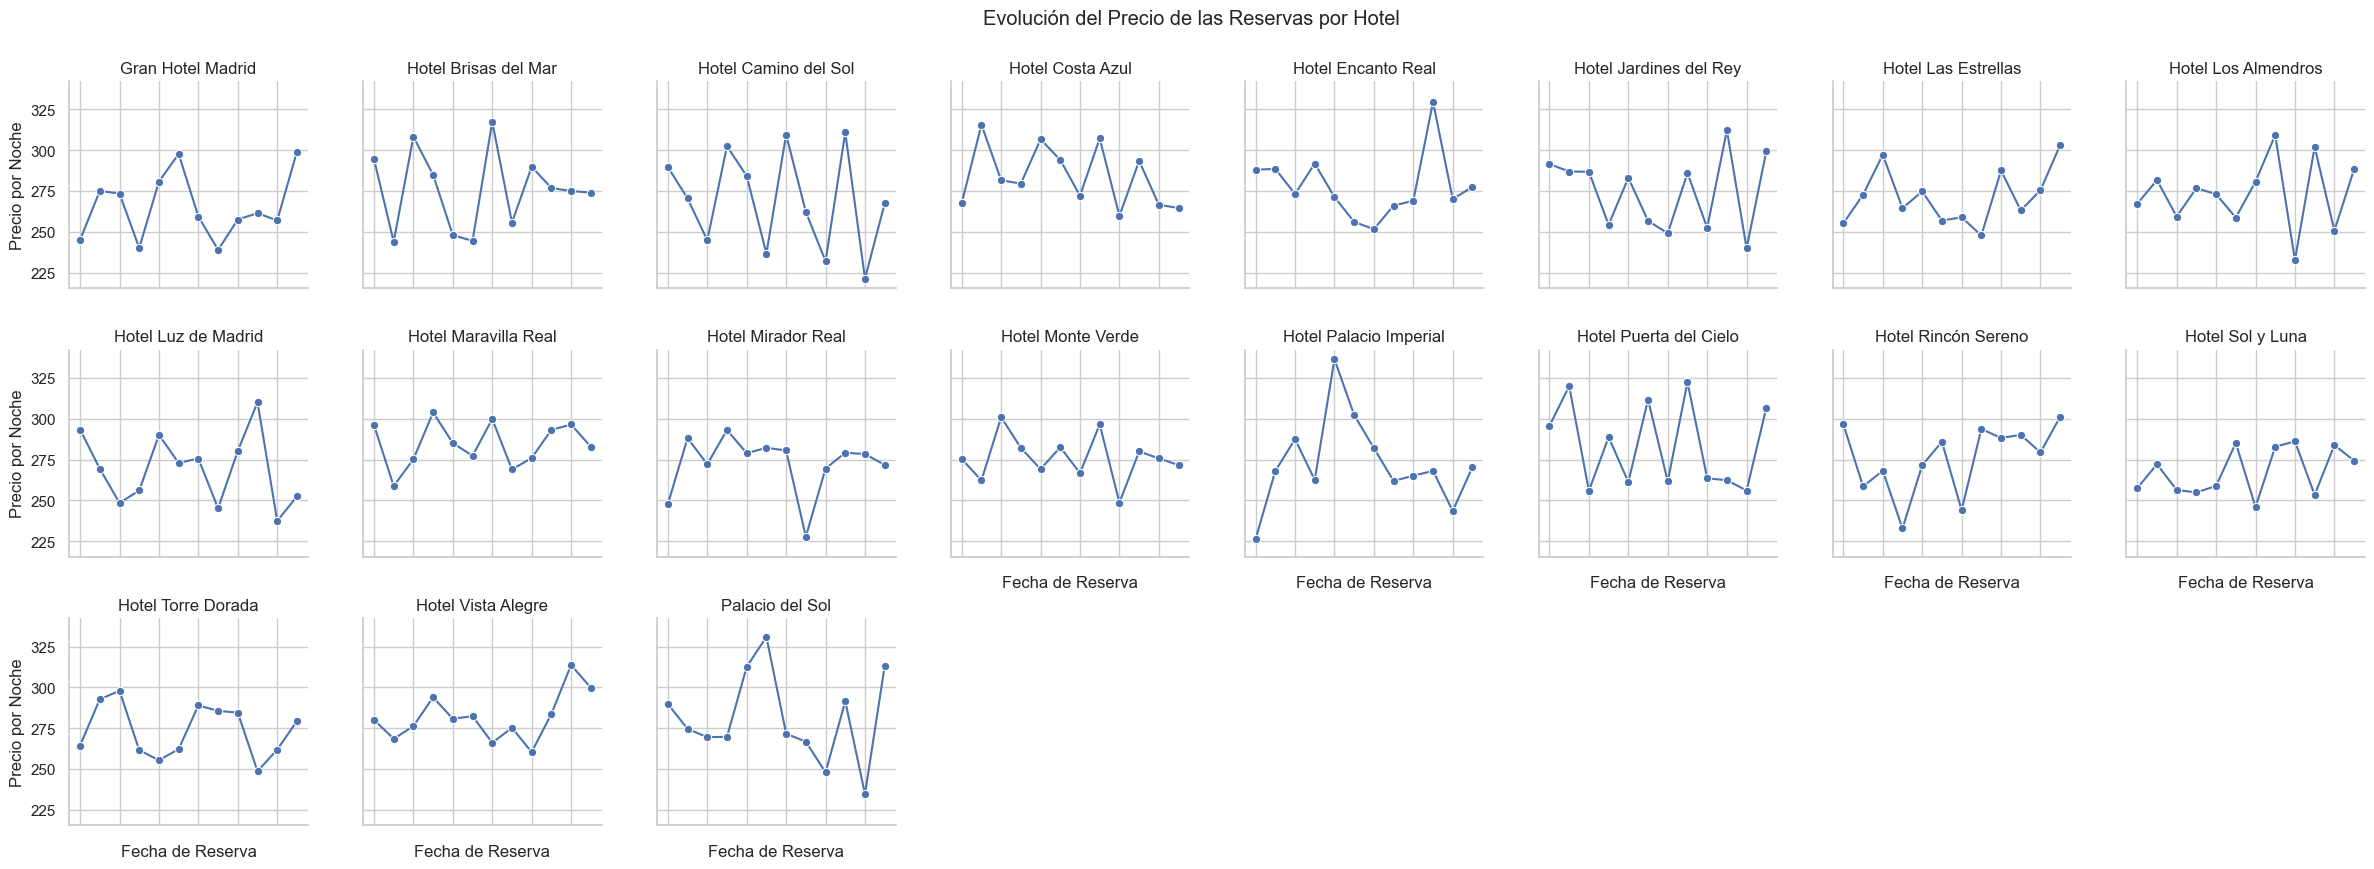

In [44]:

# Configurar el FacetGrid para separar los hoteles en diferentes subgráficos
g = sns.FacetGrid(df_reserva_precios, col="nombre_hotel", col_wrap=8, height=3, sharey=True)
g.map_dataframe(sns.lineplot, 
                x="fecha_reserva", 
                y="precio_noche", 
                marker="o")

# Mejorar formato
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Fecha de Reserva", "Precio por Noche")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Evolución del Precio de las Reservas por Hotel")

plt.show()

Los gráficos presentados muestran la evolución del precio de las reservas para 15 hoteles diferentes a lo largo del tiempo, con los precios fluctuando entre 225 y 335 unidades monetarias (probablemente euros u otra moneda local). A continuación, realizo un análisis general basado en los patrones visuales observados en los gráficos:

### - 1. Tendencias generales de precios
- Fluctuaciones comunes: 
    - Todos los hoteles presentan precios que varían con el tiempo, con picos y caídas que sugieren cambios estacionales, promociones, demanda o ajustes de tarifas.
    - No hay un hotel con un precio completamente estable, lo que indica que los precios son dinámicos y responden a factores externos o internos.

- Rango de precios: 
    - La mayoría de los hoteles mantienen sus precios dentro del rango de 250 a 300 unidades, con algunos picos ocasionales que alcanzan los 335 o descensos hacia los 225. Esto sugiere una estrategia de precios competitiva o ajustes basados en la ocupación y la temporada.

- Patrones similares: 
    - Aunque cada hotel tiene su propio perfil de fluctuación, muchos muestran picos y valles en momentos similares, lo que podría indicar factores externos comunes.

### - 2. Hoteles con precios más estables
- Algunos hoteles, como Hotel Brisas del Mar, Hotel Camino del Sol y Hotel Maravilla Real, muestran fluctuaciones más suaves y menos extremas, sugiriendo una gestión de precios más consistente o una demanda más estable.
- Otros, como Hotel Palacio Imperial y Hotel Torre Dorada, presentan variaciones más pronunciadas, con picos y caídas más marcadas, lo que podría indicar una mayor sensibilidad a la demanda, promociones agresivas o ajustes en función de la competencia.

### - 3. Hoteles con picos o caídas notables
Hotel Palacio Imperial y Hotel Encanto Real muestran algunos de los picos más altos (cerca de 335) y caídas más pronunciadas (hasta 225), lo que podría reflejar estrategias de precios dinámicos, como tarifas elevadas en temporada alta y descuentos significativos en temporada baja.
Palacio del Sol también tiene un pico notablemente alto, lo que podría indicar un período de alta demanda o un evento especial que afectó sus tarifas.

Estrategias de marketing: Los picos y caídas abruptas podrían ser resultado de promociones, descuentos o paquetes especiales ofrecidos por los hoteles.
### - 4. Comparación entre hoteles
No hay un hotel claramente más caro o más barato de manera constante, pero hoteles como Gran Hotel Madrid, Hotel Las Estrellas y Hotel Rincón Serano parecen tener fluctuaciones más amplias, lo que podría indicar una estrategia de precios más agresiva o una mayor dependencia de la temporada.
Hoteles como Hotel Luz de Madrid y Hotel Mirador Real mantienen precios más cercanos a la media (250-300), con variaciones menos extremas, lo que podría reflejar una clientela más estable o una ubicación menos sujeta a picos de demanda.

## Conclusión
En general, los precios de las reservas de estos hoteles son dinámicos y responden a factores como la demanda y las estrategias comerciales. Los hoteles con fluctuaciones más suaves podrían tener una gestión más estable o una demanda constante, mientras que aquellos con picos y caídas marcadas podrían estar ajustando sus precios para maximizar la ocupación o competir en un mercado más volátil. 